# Objective
1. load data
2. analyze data
3. predict red wine quality
4. predict red wine quality with removed outliers

# load data

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from pandas import set_option
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [13, 10]

In [ ]:
column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
bos1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',  delimiter=r";")

In [ ]:
# data frame with first 5 rows (by default)
bos1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Analyze data

In [ ]:
# dimension
bos1.shape

(1599, 12)

In [ ]:
bos1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
bos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
#no missing data

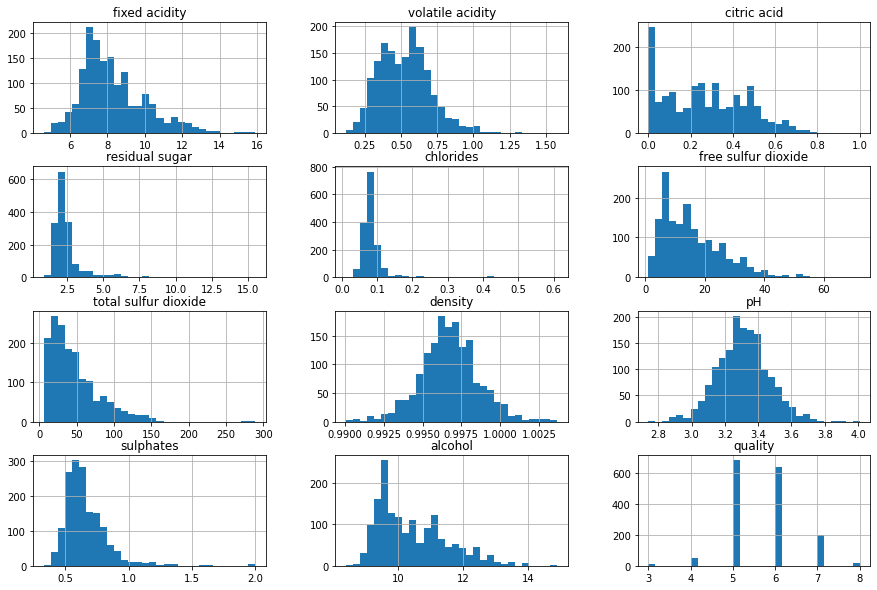

In [ ]:
#distribution plot of numeric data
bos1.hist(bins=30,figsize=(15,10),grid=True);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


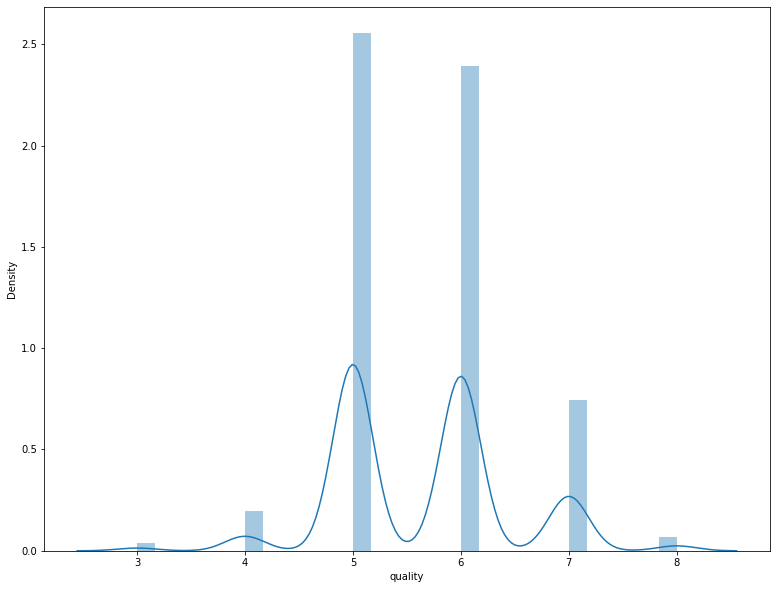

In [ ]:
#histogram
sns.distplot(bos1['quality']);

In [ ]:
# correlation
set_option('precision', 2)
bos1.corr(method='pearson')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.00,-2.56e-01,0.67,1.15e-01,9.37e-02,-1.54e-01,-0.11,0.67,-0.68,1.83e-01,-0.06,0.12
volatile acidity,-0.26,1.00e+00,-0.55,1.92e-03,6.13e-02,-1.05e-02,0.08,0.02,0.23,-2.61e-01,-0.20,-0.39
citric acid,0.67,-5.52e-01,1.00,1.44e-01,2.04e-01,-6.10e-02,0.04,0.36,-0.54,3.13e-01,0.11,0.23
residual sugar,0.11,1.92e-03,0.14,1.00e+00,5.56e-02,1.87e-01,0.20,0.36,-0.09,5.53e-03,0.04,0.01
chlorides,0.09,6.13e-02,0.20,5.56e-02,1.00e+00,5.56e-03,0.05,0.20,-0.27,3.71e-01,-0.22,-0.13
free sulfur dioxide,-0.15,-1.05e-02,-0.06,1.87e-01,5.56e-03,1.00e+00,0.67,-0.02,0.07,5.17e-02,-0.07,-0.05
total sulfur dioxide,-0.11,7.65e-02,0.04,2.03e-01,4.74e-02,6.68e-01,1.00,0.07,-0.07,4.29e-02,-0.21,-0.19
density,0.67,2.20e-02,0.36,3.55e-01,2.01e-01,-2.19e-02,0.07,1.00,-0.34,1.49e-01,-0.50,-0.17
pH,-0.68,2.35e-01,-0.54,-8.57e-02,-2.65e-01,7.04e-02,-0.07,-0.34,1.00,-1.97e-01,0.21,-0.06
sulphates,0.18,-2.61e-01,0.31,5.53e-03,3.71e-01,5.17e-02,0.04,0.15,-0.20,1.00e+00,0.09,0.25


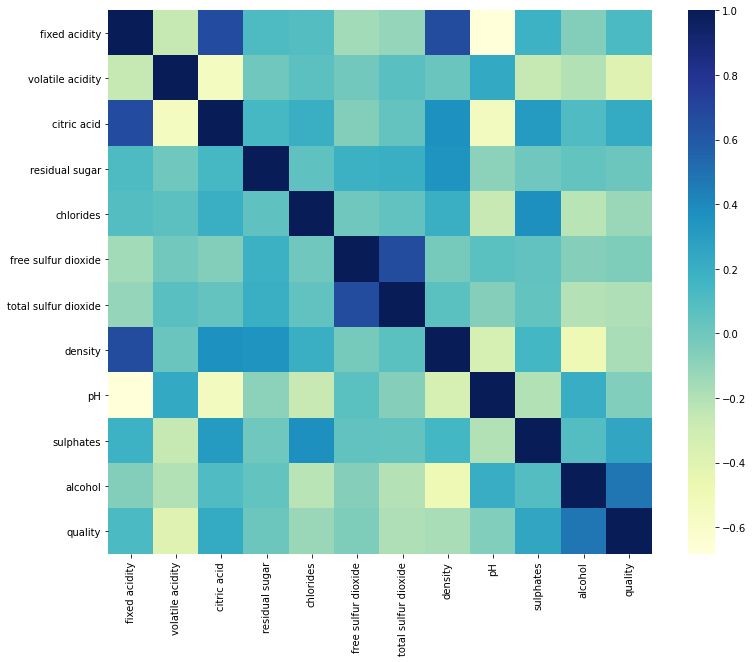

In [ ]:
#code for correlation plot

#library to establish correlation
import seaborn as sns
names = []
#creating a correlation matrix
correlations = bos1.corr()
sns.heatmap(correlations,square = True, cmap = "YlGnBu")
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#corr sorting for quality variable
bos1.corr()['quality'].sort_values(ascending=False)

quality                 1.00
alcohol                 0.48
sulphates               0.25
citric acid             0.23
fixed acidity           0.12
residual sugar          0.01
free sulfur dioxide    -0.05
pH                     -0.06
chlorides              -0.13
density                -0.17
total sulfur dioxide   -0.19
volatile acidity       -0.39
Name: quality, dtype: float64

In [ ]:
#outliers detection
Q1 = bos1.quantile(0.25)
Q3 = bos1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

fixed acidity           1.90e+00
volatile acidity        2.40e-01
citric acid             3.10e-01
residual sugar          6.00e-01
chlorides               1.80e-02
free sulfur dioxide     1.20e+01
total sulfur dioxide    3.40e+01
density                 2.08e-03
pH                      1.80e-01
sulphates               1.50e-01
alcohol                 1.50e+00
quality                 1.00e+00
dtype: float64


In [ ]:
#True = outliers
(bos1 < (Q1 - 1.5 * IQR)) |(bos1 > (Q3 + 1.5 * IQR))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,True,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


# Train a model

In [ ]:
# define x and y
y = bos1["quality"]
x=bos1.drop(['quality'],axis='columns')

In [ ]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state =5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
pred_y = lm.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
236,6,5.04
833,4,5.67
424,5,5.08
982,6,6.47
1155,5,5.28


Text(0, 0.5, 'Predicted Y')

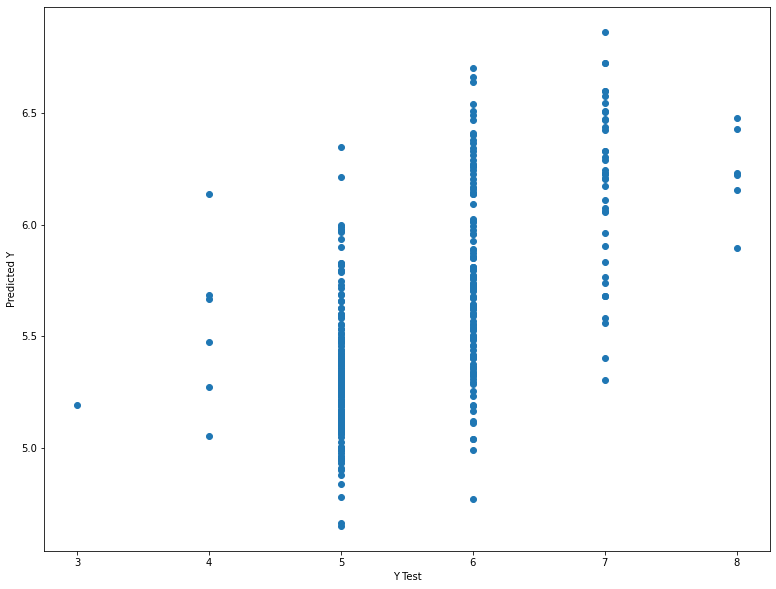

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

0.40317750456354295


In [ ]:
#R^2
R2 = lm.score(x_test, y_test, sample_weight=None)
print("R^2 = " ,R2 )

#RMSE
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
rmse = mse**0.5
print("RMES = " , rmse)

R^2 =  0.37874687431635246
RMES =  0.6349626009172059


In [ ]:
#find range of y_test
print('range y_test:', np.max(y_test)-np.min(y_test))

range y_test: 5


# result

In [ ]:
#rmes = 0.635
#range of y_test = 5
print('% error= ', (0.635/5)*100)

% error=  12.7


In [ ]:
#error of rmse vs range of y_test = 12.7% (acceptable !)

# remove outliers

In [ ]:
#remove outliner using IQR score
#link: https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba
value=0.25
Q1 = bos1.quantile(0+value)
Q3 = bos1.quantile(1-value)
IQR = Q3 - Q1
bos1 = bos1[~((bos1 < (Q1 - 1.5 * IQR)) |(bos1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
# define x and y
y = bos1["quality"]
x=bos1.drop(['quality'],axis='columns')
bos1.shape

(1050, 12)

In [ ]:
#split data (train/test)

from sklearn.model_selection import train_test_split
#testing data size is of 20% of entire data
x_train, x_test, y_train, y_test =train_test_split(x,y, test_size = 0.2, random_state =5)

In [ ]:
from sklearn.linear_model import LinearRegression
#fitting our model to train and test
lm = LinearRegression()
model = lm.fit(x_train,y_train)

In [ ]:
pred_y = lm.predict(x_test)

In [ ]:
pd.DataFrame({"Actual": y_test, "Predict": pred_y}).head()

,Actual,Predict
1359,6,5.77
784,5,5.17
241,6,6.03
901,7,5.65
1112,6,6.11


Text(0, 0.5, 'Predicted Y')

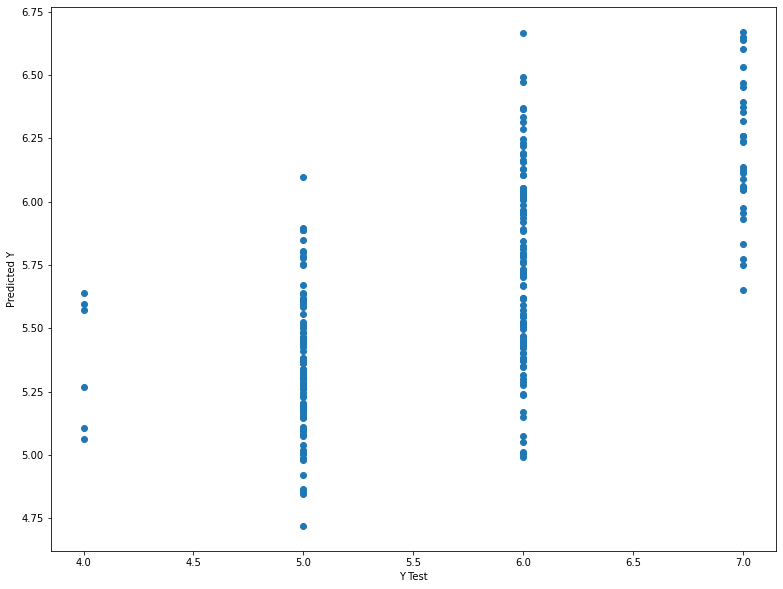

In [ ]:
plt.scatter(y_test,pred_y)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [ ]:
# calculate MSE
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
print(mse)

0.3175196117648633


In [ ]:
#R^2
R2 = lm.score(x_test, y_test, sample_weight=None)
print("R^2 = " ,R2 )

#RMSE
import sklearn
mse = sklearn.metrics.mean_squared_error(y_test, pred_y)
rmse = mse**0.5
print("RMES = " , rmse)

R^2 =  0.40470016168391854
RMES =  0.563488785837716


In [ ]:
#find range of y_test
print('range y_test:', np.max(y_test)-np.min(y_test))

range y_test: 3


# result (from remove outliner)

In [ ]:
#rmse before = 0.6349626009172059, shape = (1599, 12)
#emse after = 0.563488785837716, shape = (1050, 12)